<a href="https://colab.research.google.com/github/harshithagundrajula/cardio-train-major/blob/main/Cardiovascular_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files, drive

In [ ]:
from google.colab import files
uploaded = files.upload()   # This will open a browse window


Saving cardio_train dataset corizo.csv to cardio_train dataset corizo.csv


In [ ]:
import pandas as pd

# Load your uploaded CSV file
df = pd.read_csv("cardio_train dataset corizo.csv")

# Show first 5 rows
df.head()


,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0


In [ ]:
# Check first 5 rows
df.head()


,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0


In [ ]:
# Shape of dataset (rows, columns)
df.shape


(70000, 1)

In [ ]:
# Info about columns (data types, nulls)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 1 columns):
 #   Column                                                                             Non-Null Count  Dtype 
---  ------                                                                             --------------  ----- 
 0   id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio  70000 non-null  object
dtypes: object(1)
memory usage: 547.0+ KB


In [ ]:
# Statistical summary (mean, min, max, etc.)
df.describe()


,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
count,70000
unique,70000
top,99974;19652;1;165;72.0;120;80;1;1;0;0;1;0
freq,1


In [ ]:
# Check for missing values
df.isnull().sum()


,0
id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio,0


In [ ]:
import pandas as pd


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving cardio_train dataset corizo.csv to cardio_train dataset corizo (1).csv


In [ ]:
list(uploaded.keys())


['cardio_train dataset corizo (1).csv']

In [ ]:
import os
os.listdir()


['.config',
 'cardio_train dataset corizo.csv',
 'cardio_train dataset corizo (1).csv',
 'sample_data']

In [ ]:
import pandas as pd

df = pd.read_csv("cardio_train dataset corizo.csv", sep=";")

# Check first rows & info
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
df = df.drop(columns=["id"])

In [ ]:
X = df.drop(columns=["cardio"])   # Features
y = df["cardio"]                  # Target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (56000, 11)
Test shape: (14000, 11)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# Train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.7136
KNN Accuracy: 0.6483
Decision Tree Accuracy: 0.6335
Random Forest Accuracy: 0.7130
SVM Accuracy: 0.7248


Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      7004
           1       0.74      0.69      0.72      6996

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000



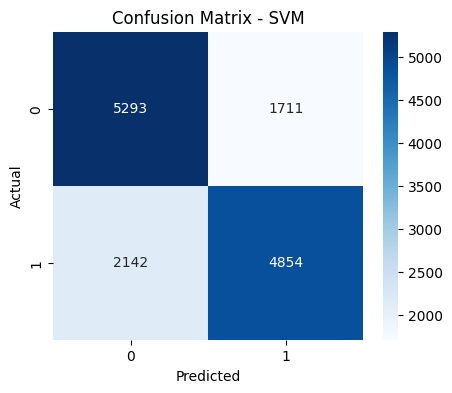

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Best model = SVM
best_model = models["SVM"]

# Predictions
y_pred = best_model.predict(X_test_scaled)

# Classification report
print("Classification Report for SVM:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


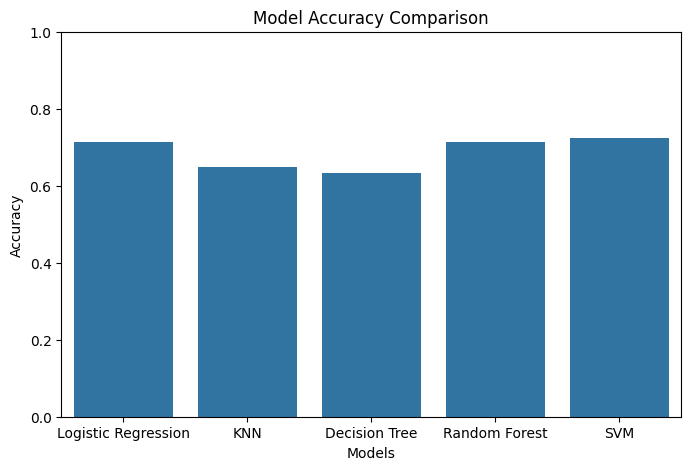

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot accuracy comparison
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()


In [ ]:
import joblib

# Save the trained best model (SVM)
joblib.dump(best_model, "svm_heart_model.joblib")

# Download the model file
from google.colab import files
files.download("svm_heart_model.joblib")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load the saved model
svm_model = joblib.load("svm_heart_model.joblib")

# Example: predict on one new patient (make sure features are in same order as X_train)
# Example values: [age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active]
sample_patient = [[20000, 2, 165, 70, 120, 80, 1, 1, 0, 0, 1]]

# Don’t forget to scale using the same scaler
sample_patient_scaled = scaler.transform(sample_patient)

prediction = svm_model.predict(sample_patient_scaled)
print("Prediction (0=No disease, 1=Disease):", prediction[0])


Prediction (0=No disease, 1=Disease): 0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


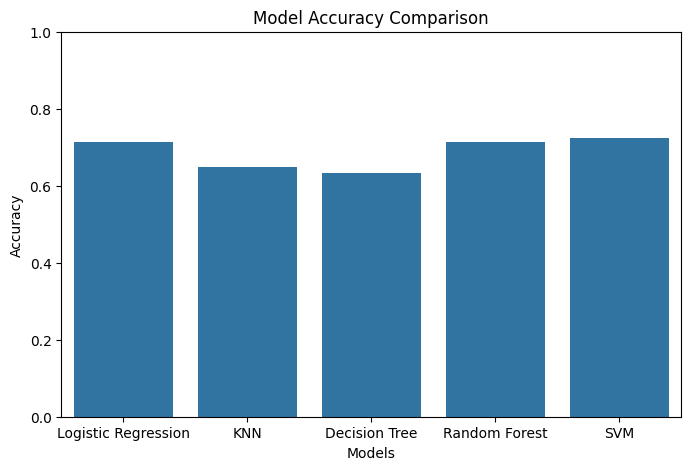

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()
